In [1]:
import numpy as np

# Construct an image with repeated delta functions
deltas = np.zeros((2048, 2048))
deltas[8::16,8::16] = 1

In [2]:
deltas

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

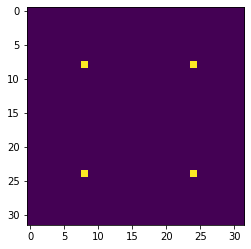

In [3]:
import pylab as pyl
# Necessary command to render a matplotlib image in a Jupyter notebook.
%matplotlib inline

# Display the image
# You can zoom in using the menu in the window that will appear
pyl.imshow(deltas[0:32, 0:32])
pyl.show()

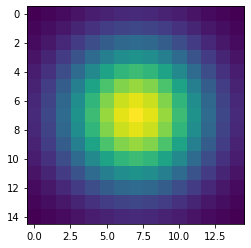

In [4]:
x, y = np.meshgrid(np.linspace(-2, 2, 15), np.linspace(-2, 2, 15))
dst = np.sqrt(x*x + y*y)
sigma = 1
muu = 0.000
gauss = np.exp(-((dst-muu)**2/(2.0 * sigma**2)))
pyl.imshow(gauss)
pyl.show()

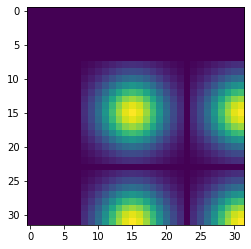

1.72 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [5]:
from scipy.signal import convolve2d as convolve2d_cpu

convolved_image_using_CPU = convolve2d_cpu(deltas, gauss)
pyl.imshow(convolved_image_using_CPU[0:32, 0:32])
pyl.show()
%timeit -n 1 -r 1 convolve2d_cpu(deltas, gauss)

In [6]:
import cupy as cp

deltas_gpu = cp.asarray(deltas)
gauss_gpu = cp.asarray(gauss)

In [9]:
deltas_gpu.device

<CUDA Device 0>

In [7]:
from cupyx.scipy.signal import convolve2d as convolve2d_gpu

convolved_image_using_GPU = convolve2d_gpu(deltas_gpu, gauss_gpu)
%timeit -n 7 -r 1 convolved_image_using_GPU = convolve2d_gpu(deltas_gpu, gauss_gpu)

136 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 7 loops each)


In [8]:
np.allclose(convolved_image_using_GPU, convolved_image_using_CPU)

array(True)

In [10]:
# 실제 시간은 보내고 다시 돌아오는 시간까지 고려
def transfer_compute_transferback():
    deltas_gpu = cp.asarray(deltas)
    gauss_gpu = cp.asarray(gauss)
    convolved_image_using_GPU = convolve2d_gpu(deltas_gpu, gauss_gpu)
    convolved_image_using_GPU_copied_to_host = cp.asnumpy(convolved_image_using_GPU)
   
%timeit -n 7 -r 1 transfer_compute_transferback()

34.8 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 7 loops each)


In [18]:
convolve2d_cpu(deltas_gpu, gauss_gpu)

TypeError: Implicit conversion to a NumPy array is not allowed. Please use `.get()` to construct a NumPy array explicitly.

In [19]:
deltas_1d = deltas.ravel()
gauss_1d = gauss.diagonal()
%timeit -n 1 -r 1 np.convolve(deltas_1d, gauss_1d)

96.4 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [20]:
deltas_1d_gpu = cp.asarray(deltas_1d)
gauss_1d_gpu = cp.asarray(gauss_1d)
%timeit -n 7 -r 1 np.convolve(deltas_1d_gpu, gauss_1d_gpu)

111 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 7 loops each)


: 

In [17]:
ary.ravel() + b.ravel()

TypeError: Unsupported type <class 'numpy.ndarray'>